In [616]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Read the Titanic.csv dataset
titanic_df = pd.read_csv("Titanic.csv")
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [617]:
# Overview the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## What kind of data we have?  
PassengerId - [Integer][Continuous] - Passenger ID.  
Survived - [Integer][Categorical] - 1: survived, 0: not survived.  
Pclass - [Integer][Categorical] - The class of the passenger.  
Name - [String] - The name of passenger.  
Sex - [String][Categorical] - male or female.  
Age - [Double][Categorical] - The age of the passenger.  
SibSp - [Integer] - The number of siblings or spouses.  
Parch - [Integer] - The number of parents or children.  
Ticket - [String] - The ticket number.  
Fare - [Double][Continuous] - The fare paid for the ticket.  
Embarked - [Integer][Categorical] - The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).  

## Data Cleaning    
Over the missing values.

In [618]:
# Get the number of missing data points per column
missing_values_count = titanic_df.isnull().sum()
print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


A matrix visullization of missing values.

<Axes: >

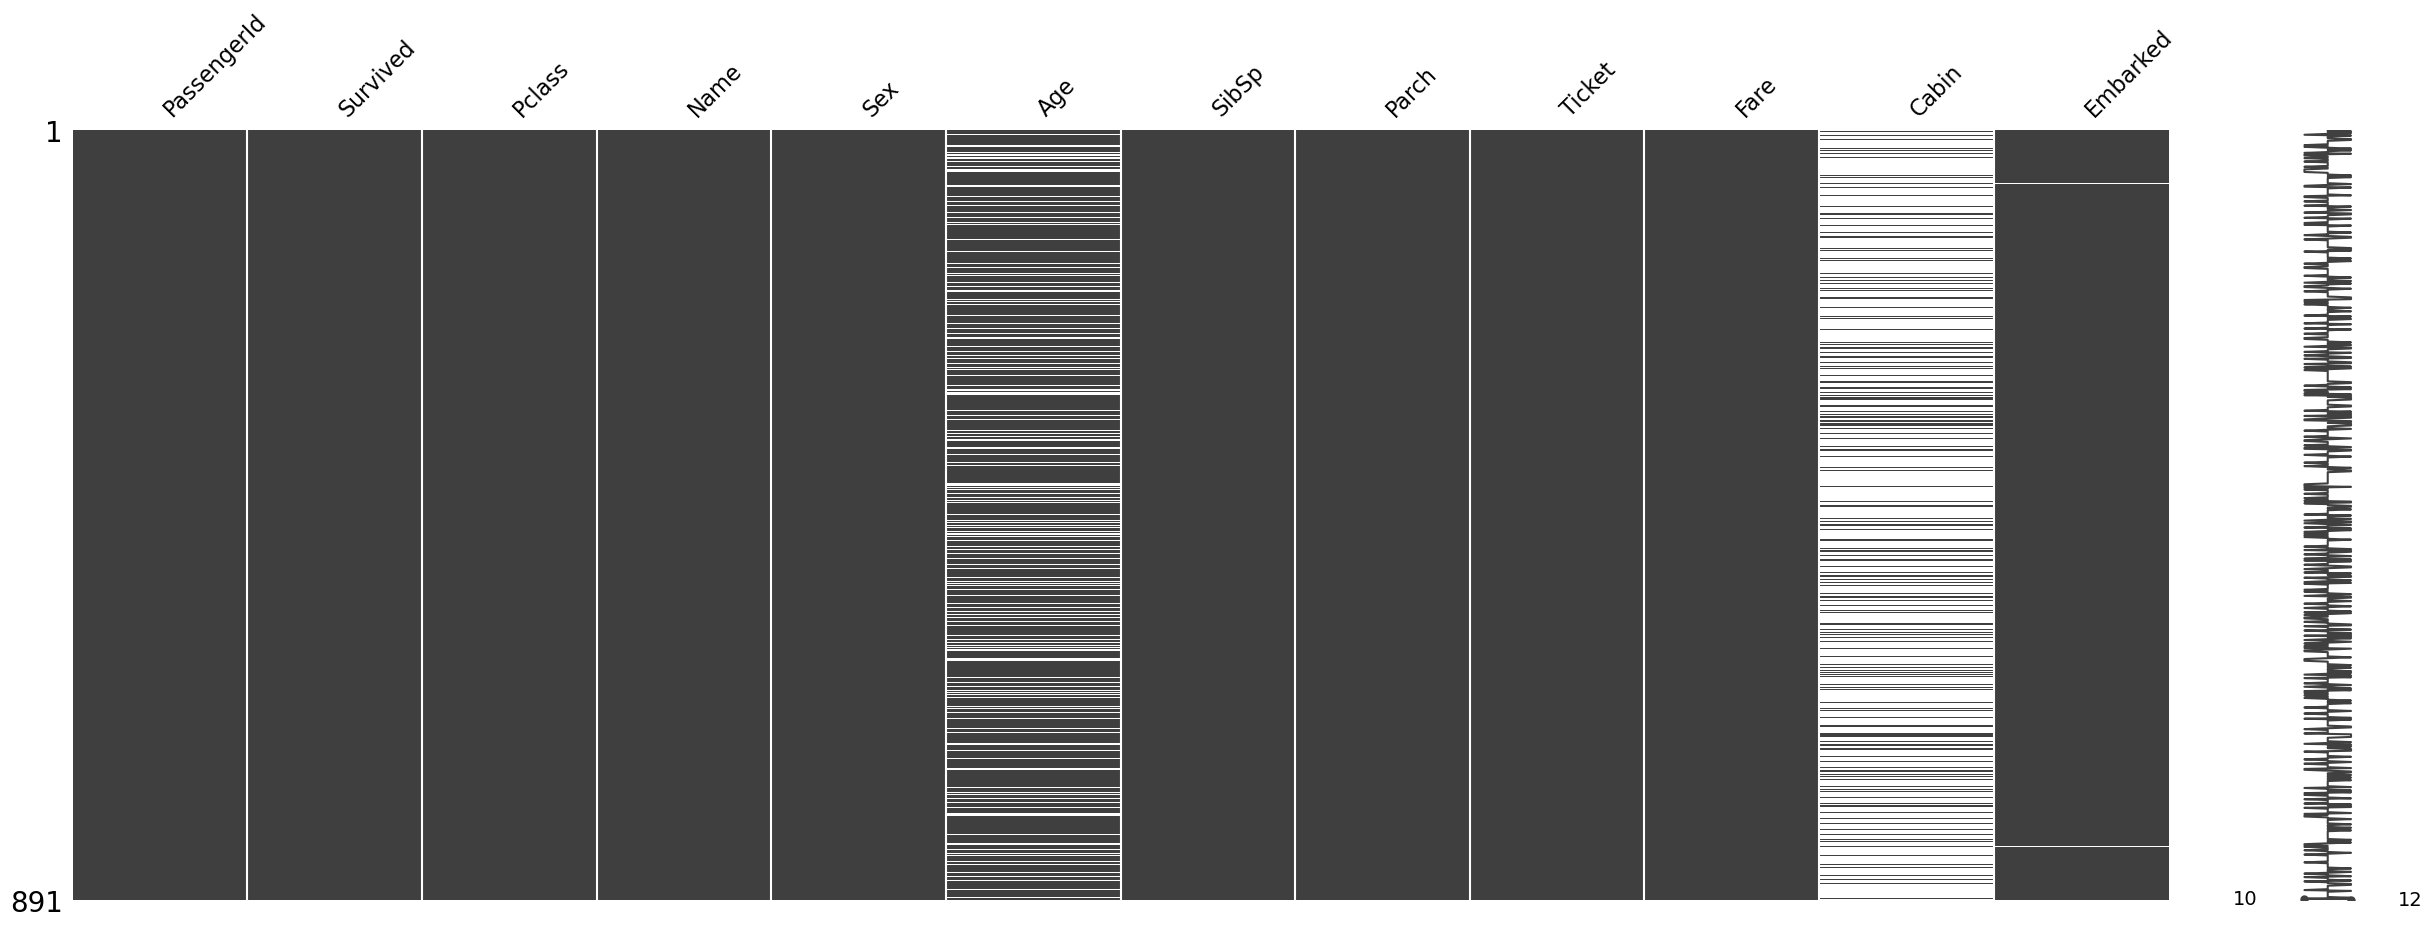

In [619]:
# Plot graphic of missing values
missingno.matrix(titanic_df, figsize = (30,10))


From common sense, columns such as PassengerId, Name and Ticket shouldn"t be related to the survival probability. So these columns can be droped.   
It is also seen that there are too much missing values (687/891) in Cabin column, so also drop Cabin column.

In [620]:
# Drop Cabin column
titanic_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

Since there are a significant number of missing values (177 out of 891), simply dropping these rows might result in loss of valuable information. Instead, Impute the missing values with the median age may be a better way.  
Embarked column has only 2 missing values, so impute them with the mode.

In [621]:
# Handle Age column missing value with median age 
median_age = titanic_df["Age"].median()
titanic_df["Age"].fillna(median_age, inplace=True)

# Embarked column only 2 missing values, so fill with mode
mode_embarked = titanic_df["Embarked"].mode()[0]
titanic_df["Embarked"].fillna(mode_embarked, inplace=True)

# Get the number of missing data points per column
missing_values_count = titanic_df.isnull().sum()
print(missing_values_count)
print(titanic_df.shape)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(891, 8)


## Data Visualization and Analysis

In [622]:
# Generate a describtive statistic
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


• 38.4% people survived    
• More number of people were actually in 3rd class  
• 50% of passengers were in between the age of 20 to 38 

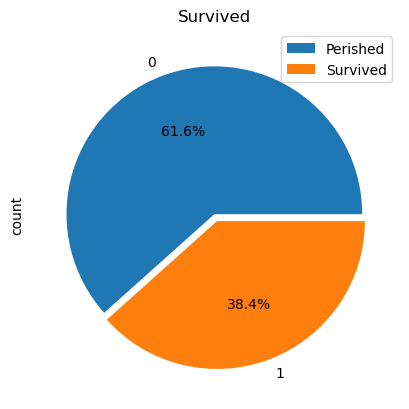

In [623]:
# Plot a pie chart show the survived rate
titanic_df["Survived"].value_counts().plot(kind="pie", explode=[0,0.05],autopct="%1.1f%%")
plt.title("Survived")
plt.legend(["Perished", "Survived"])
plt.show()

### 1. What is the most important factor in determining survival of the Titanic incident?

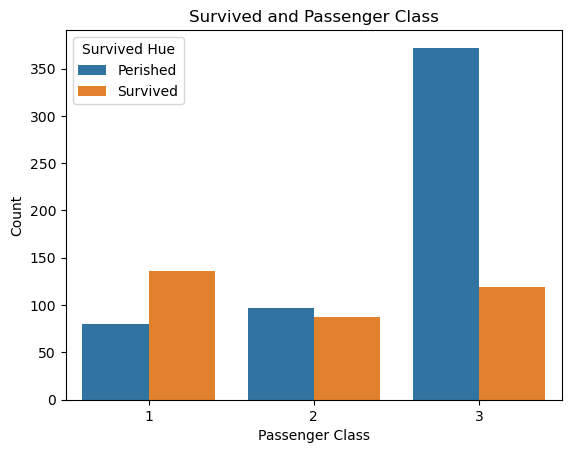

In [624]:
# Convert Survived column to string type
titanic_df["Survived Hue"] = titanic_df["Survived"].map({0: "Perished", 1: "Survived"})

# Barplot Survived and Pclass
sns.countplot(data=titanic_df, x="Pclass", hue="Survived Hue")
plt.title("Survived and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

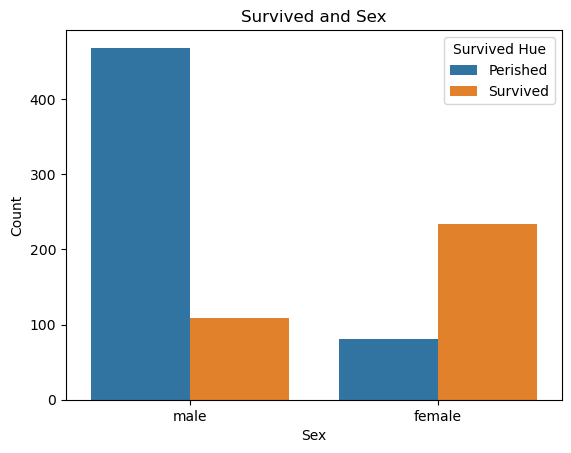

In [625]:
# Barplot Survived and Sex
sns.countplot(data=titanic_df, x="Sex", hue="Survived Hue")
plt.title("Survived and Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


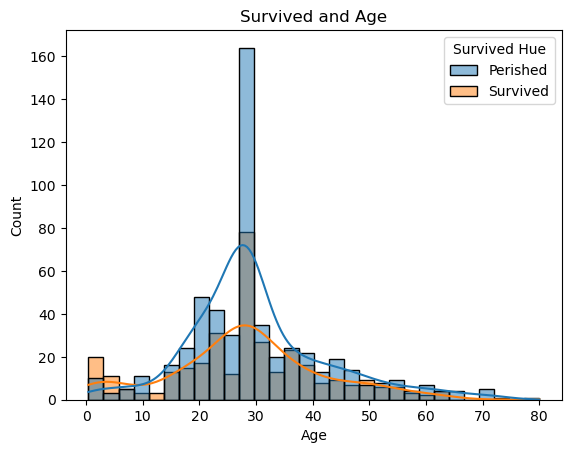

In [626]:
# Histogram Survived and Age
sns.histplot(data=titanic_df, x="Age", hue="Survived Hue",  kde=True)
plt.title("Survived and Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

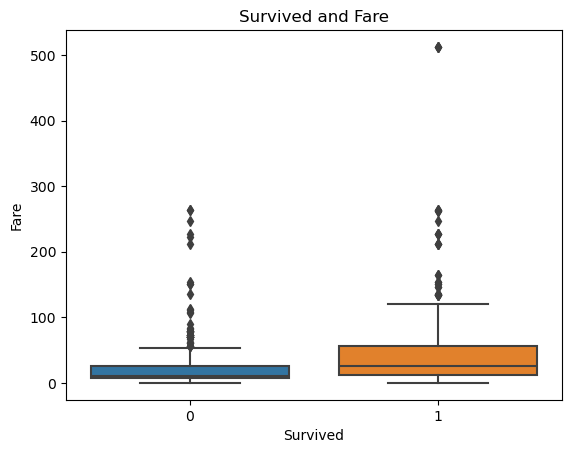

In [627]:
# Boxplot Survived and Fare
sns.boxplot(data=titanic_df, x="Survived", y="Fare")
plt.title("Survived and Fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

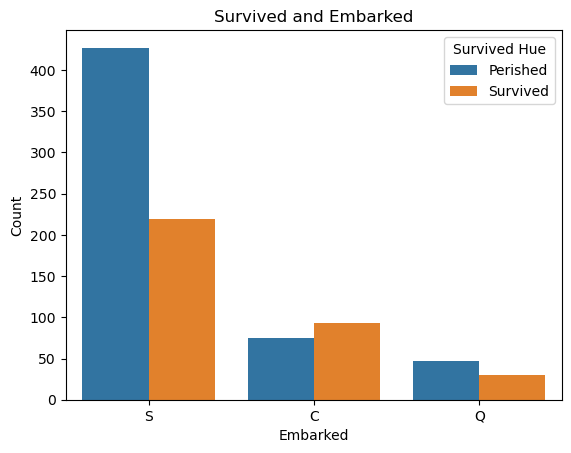

In [628]:
# Barplot Survived and Embarked
sns.countplot(data=titanic_df, x="Embarked", hue="Survived Hue")
plt.title("Survived and Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

From common sense, SibSp and Parch factors, about family size, seem no correlations with survived factor. In these plots, sex factor is the most important factor in determining survival of the Titanic incident.

### 2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


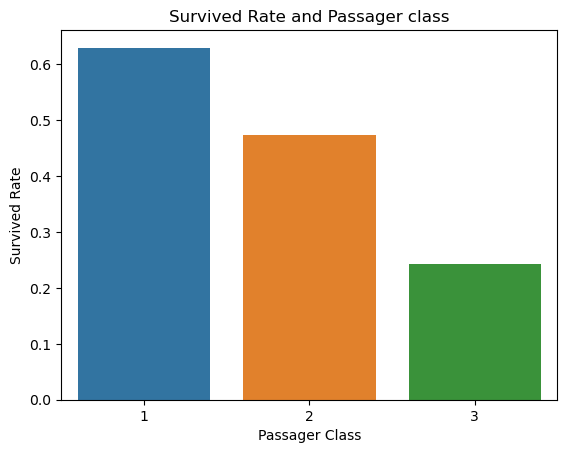

In [629]:
# Survived rate groupby Pclass
pclass_survived_mean = titanic_df.groupby("Pclass")["Survived"].mean().reset_index()
print(pclass_survived_mean)

# Create a barplot to visualize the survived rate by Pclass
sns.barplot(data=pclass_survived_mean, x="Pclass", y="Survived")
plt.title("Survived Rate and Passager class")
plt.xlabel("Passager Class")
plt.ylabel("Survived Rate")
plt.show()

In this plot, we can easily visualize higher survived rates in the 1st passager class compared to those in the lower classes. So we can guess the upper-class passengers were given preference on
lifeboats.

### 3. “Women and children first”. Was this the case?

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


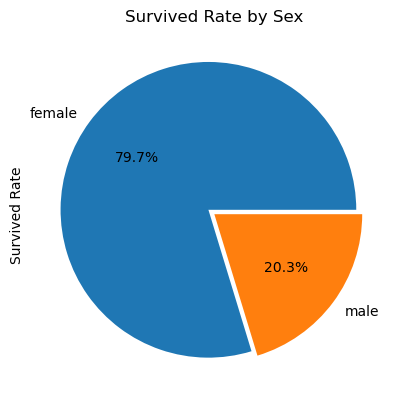

In [630]:
# Survived rate groupby Sex
sex_survived_mean = titanic_df.groupby("Sex")["Survived"].mean()
print(sex_survived_mean)

# Create a barplot to visualize the survived rate by Pclass
sex_survived_mean.plot(kind="pie", explode=[0.05, 0], autopct="%1.1f%%")
plt.title("Survived Rate by Sex")
plt.ylabel("Survived Rate")
plt.show()

Age Group
0-17     0.503597
18-34    0.353271
35-49    0.398693
50-64    0.375000
65+      0.125000
Name: Survived, dtype: float64


/var/folders/2d/bkymjm414lj9tdvt2pmpqxlw0000gn/T/ipykernel_31831/2591753415.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived_mean = titanic_df.groupby("Age Group")["Survived"].mean()


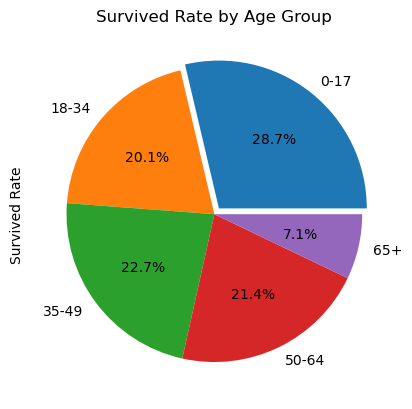

In [631]:
# Creat age groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ["0-17", "18-34", "35-49", "50-64", "65+"]
titanic_df["Age Group"] = pd.cut(x=titanic_df["Age"], bins=age_bins, labels=age_labels)

# Survived rate groupby Age Group
age_survived_mean = titanic_df.groupby("Age Group")["Survived"].mean()
print(age_survived_mean)

# Creat Pie Plot
age_survived_mean.plot(kind="pie", explode=[0.05, 0, 0, 0, 0], autopct="%1.1f%%")
plt.title("Survived Rate by Age Group")
plt.ylabel("Survived Rate")
plt.show()

  Age Group     Sex  Survived
0      0-17  female  0.676471
1      0-17    male  0.338028
2     18-34  female  0.751445
3     18-34    male  0.162983
4     35-49  female  0.732143
5     35-49    male  0.206186
6     50-64  female  0.941176
7     50-64    male  0.128205
8       65+  female       NaN
9       65+    male  0.125000


/var/folders/2d/bkymjm414lj9tdvt2pmpqxlw0000gn/T/ipykernel_31831/3651906712.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_rate_age_sex = titanic_df.groupby(["Age Group", "Sex"])["Survived"].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavio

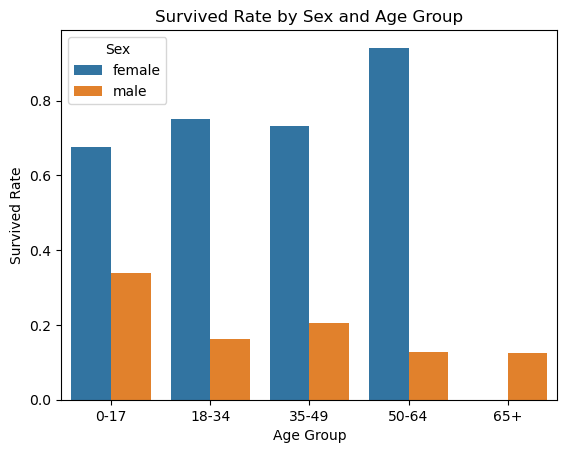

In [632]:

# Survived rate by age group and sex
survived_rate_age_sex = titanic_df.groupby(["Age Group", "Sex"])["Survived"].mean().reset_index()
print(survived_rate_age_sex)

# Creat barplot 
sns.barplot(data=survived_rate_age_sex, x="Age Group", y="Survived", hue="Sex")
plt.title("Survived Rate by Sex and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survived Rate")
plt.show()

Yes, Women and children survived rates are higher, so women and children first.

### 4. Add one other observation that you have noted in the dataset.

    Pclass Age Group  Survived
0        1      0-17  0.875000
1        1     18-34  0.666667
2        1     35-49  0.615385
3        1     50-64  0.485714
4        1       65+  0.250000
5        2      0-17  0.793103
6        2     18-34  0.428571
7        2     35-49  0.457143
8        2     50-64  0.230769
9        2       65+  0.000000
10       3      0-17  0.351064
11       3     18-34  0.239521
12       3     35-49  0.094340
13       3     50-64  0.125000
14       3       65+  0.000000


/var/folders/2d/bkymjm414lj9tdvt2pmpqxlw0000gn/T/ipykernel_31831/3589487473.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_pclass_sex_age = titanic_df.groupby(["Pclass", "Age Group"])["Survived"].mean().reset_index()


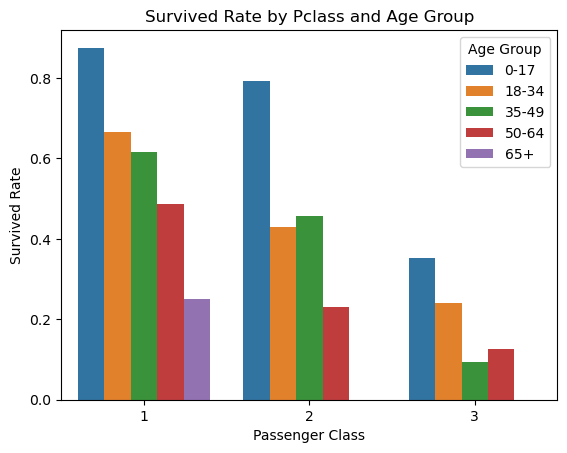

In [633]:
# Survived rate by Pclass and Age Group
survived_pclass_sex_age = titanic_df.groupby(["Pclass", "Age Group"])["Survived"].mean().reset_index()
print(survived_pclass_sex_age)

# Creat barplot 
sns.barplot(data=survived_pclass_sex_age, x="Pclass", y="Survived", hue="Age Group")
plt.title("Survived Rate by Pclass and Age Group")
plt.xlabel("Passenger Class")
plt.ylabel("Survived Rate")
plt.show()

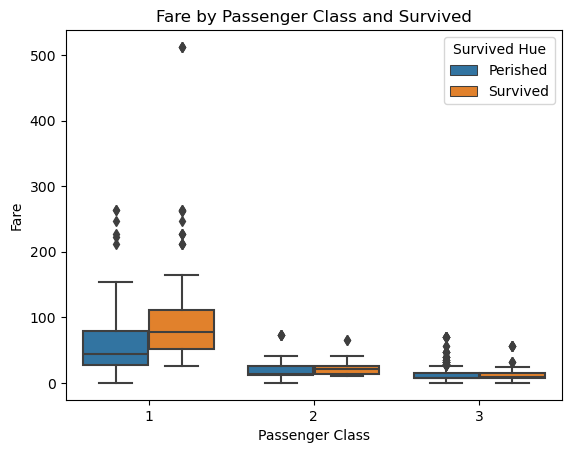

In [634]:
# Creat boxplot to find Pclass, Fare and Survived
sns.boxplot(x="Pclass", y="Fare", hue="Survived Hue", data=titanic_df)
plt.title("Fare by Passenger Class and Survived")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

In these plots, certain upper-class and different age groups of passengers were more likely to survive based on their good economic status.

Family Size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


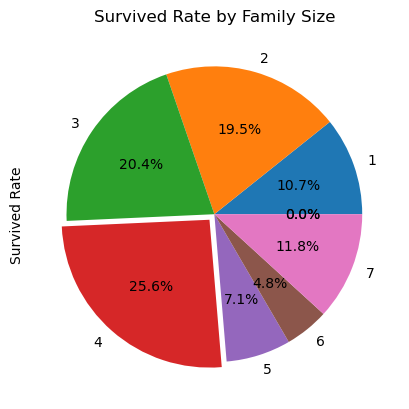

In [635]:
# Survived rate groupby Family Size
titanic_df["Family Size"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
family_survived_mean = titanic_df.groupby("Family Size")["Survived"].mean()
print(family_survived_mean)

# Creat pieplot
family_explode = [0, 0, 0, 0.05, 0, 0, 0, 0, 0]
family_survived_mean.plot(kind="pie", explode=family_explode, autopct="%1.1f%%")
plt.title("Survived Rate by Family Size")
plt.ylabel("Survived Rate")
plt.show()

Passengers who have middle size family have the highest surived rate than other passengers.